In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\aijul\Desktop\EDA on cancer dataset\global_cancer_patients_2015_2024.csv")

In [4]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [5]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  str    
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  str    
 3   Country_Region         50000 non-null  str    
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  str    
 11  Cancer_Stage           50000 non-null  str    
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8)

In [6]:
data.duplicated().sum()

np.int64(0)

### Descriptive analysis

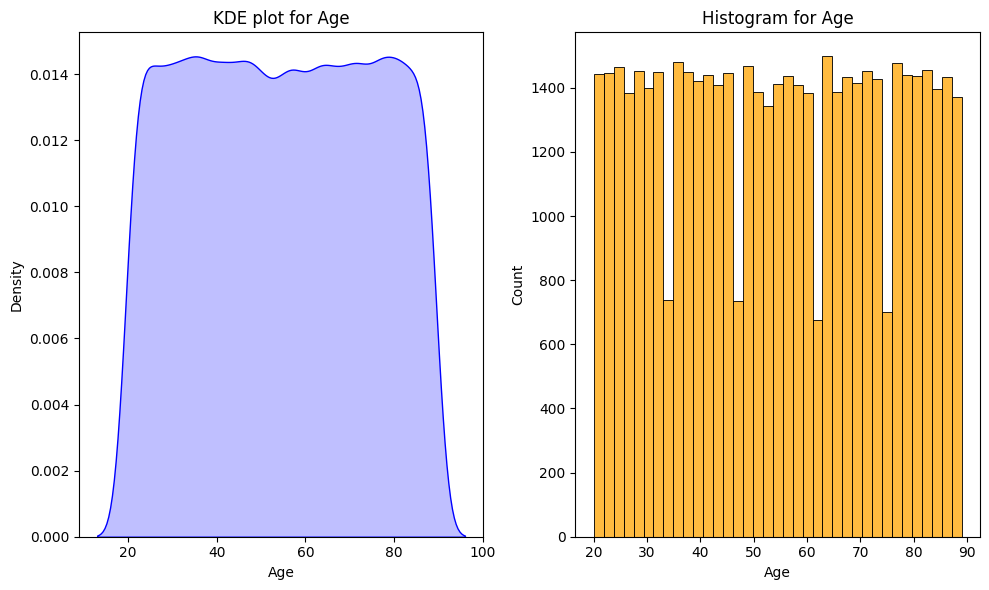

In [7]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="blue")
plt.title("KDE plot for Age")


plt.subplot(1,2,2)
sns.histplot(data["Age"], kde=False, color="orange")
plt.title("Histogram for Age")

plt.tight_layout()
plt.show()


In [8]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

# INFERENCE

-Range: 20 to 89 years
-Mean Age: 54.42 years
-Standard Deviation: 20.22
-Interquartile Range (IQR): 37 (Q1) to 72 (Q3)
-This suggests a broad representation of both young and elderly patients in the dataset, which supports age-based comparative analysis.

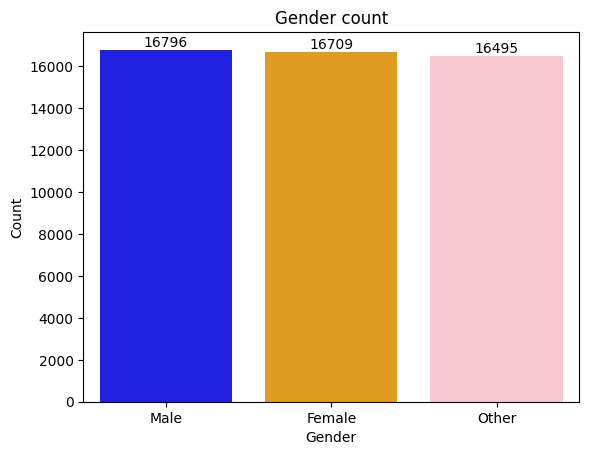

In [9]:
# Gender column analysis
data["Gender"].value_counts()

sns.barplot(x=data["Gender"].value_counts().index,
            y=data["Gender"].value_counts().values,
            palette=["blue", "orange", "pink"]) 

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [10]:
data["Gender"].value_counts(normalize=True) * 100

Gender
Male      33.592
Female    33.418
Other     32.990
Name: proportion, dtype: float64

In [11]:
data["Gender"].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

The dataset contains three gender categories(Male, Female ,other) with the most common being Male (16,796 records).
Gender distribution is sufficient for evaluating gender-specific survival trends and severity outcomes.

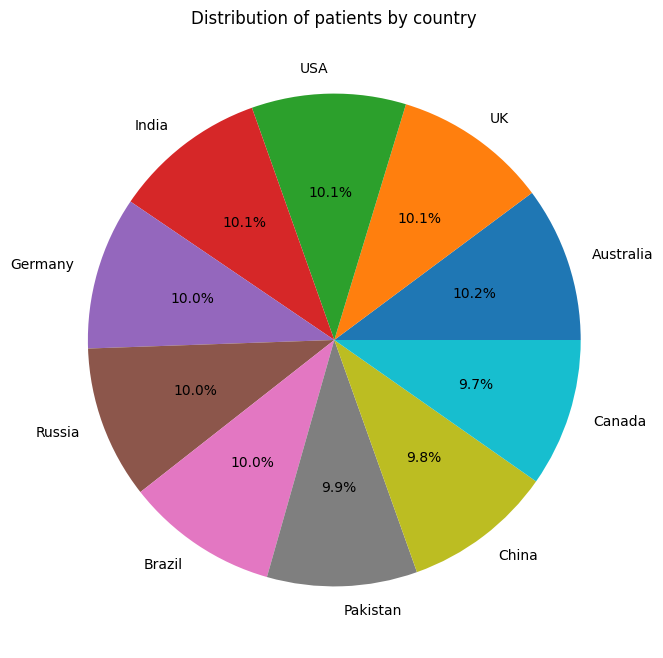

In [12]:
# countries column

country_counts = data["Country_Region"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct="%1.1f%%")

plt.title("Distribution of patients by country")
plt.show()

Patients come from 10 different countries/regions, with Australia being the most represented (5,092 patients). Number of data points for each country is almost same.
This diversity enables cross-country comparison of cancer outcomes and treatment economic.

In [13]:
#cancer type column

data["Cancer_Type"].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

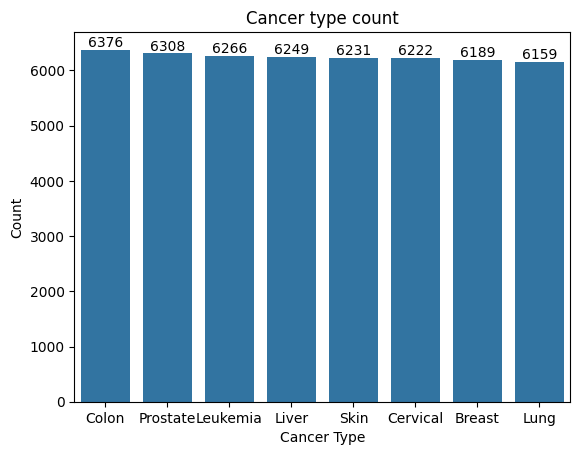

In [14]:
data["Cancer_Type"].value_counts()
sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

for i, v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

We have in  total 8 types of cancer , with each cancer having approx same number of data points under the label , most common cnacers are colon cancer followed by Prostate cancer

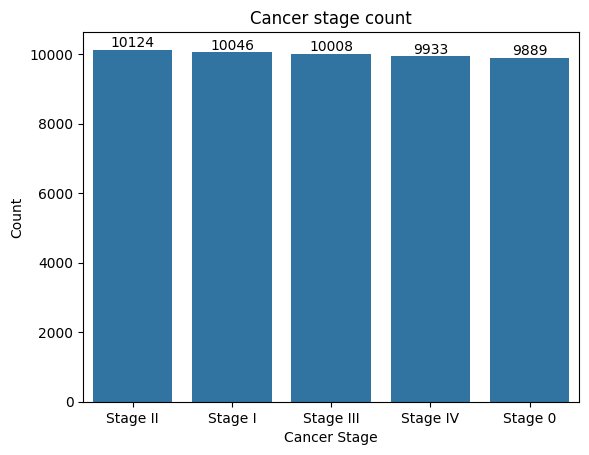

In [22]:
#cancer stage
data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

for i, v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer stage count")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4 , with stage 2 the most common one , and each stage have  almost same number of data pointsn under its label.

In [ ]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  str    
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  str    
 3   Country_Region         50000 non-null  str    
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  str    
 11  Cancer_Stage           50000 non-null  str    
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8)

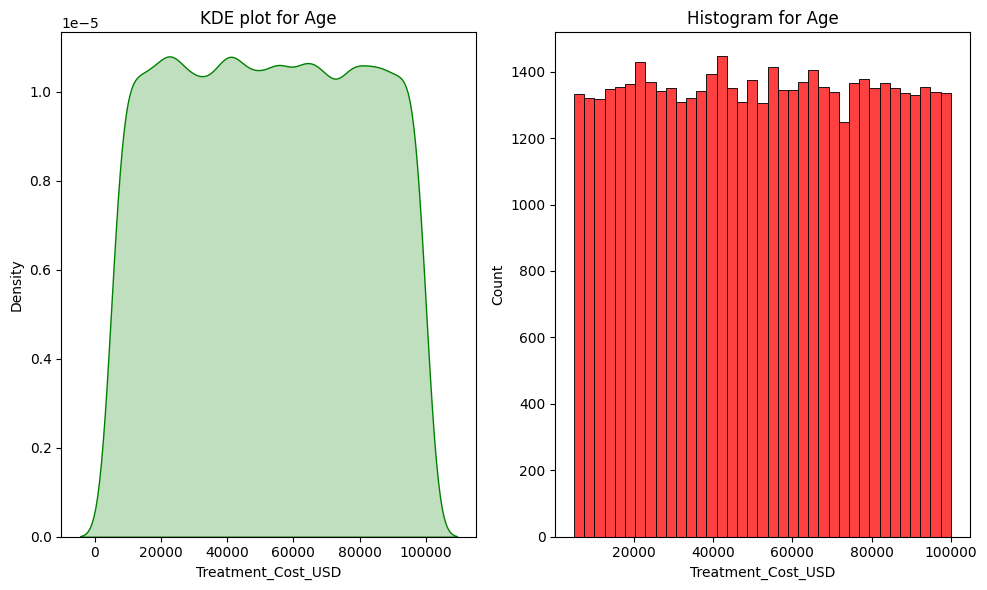

In [ ]:
#plotting for treatment cost

#plotting for age column
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="green")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], kde=False, color="red")
plt.title("Histogram for Age")

plt.tight_layout()
plt.show()


In [ ]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

Treatment cost USD have no skewness , and there are almost same number of data points under each bin as observed by histogram


In [16]:
# Analyzing the risk factors
column_of_interrest = ["Genetic_Risk", "Air_Pollution", "Alcohol_Use", "Smoking", "Obesity_Level"]

summary = data[column_of_interrest].agg(["mean", "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


These variables have nearly identical means and standard deviations, indicating they were likely designed on the same standardized scale. They are essential in studying interaction effects (e.g., genetic risk × smoking) on survival.

# Determine the relationship between risk factors and cancer severity

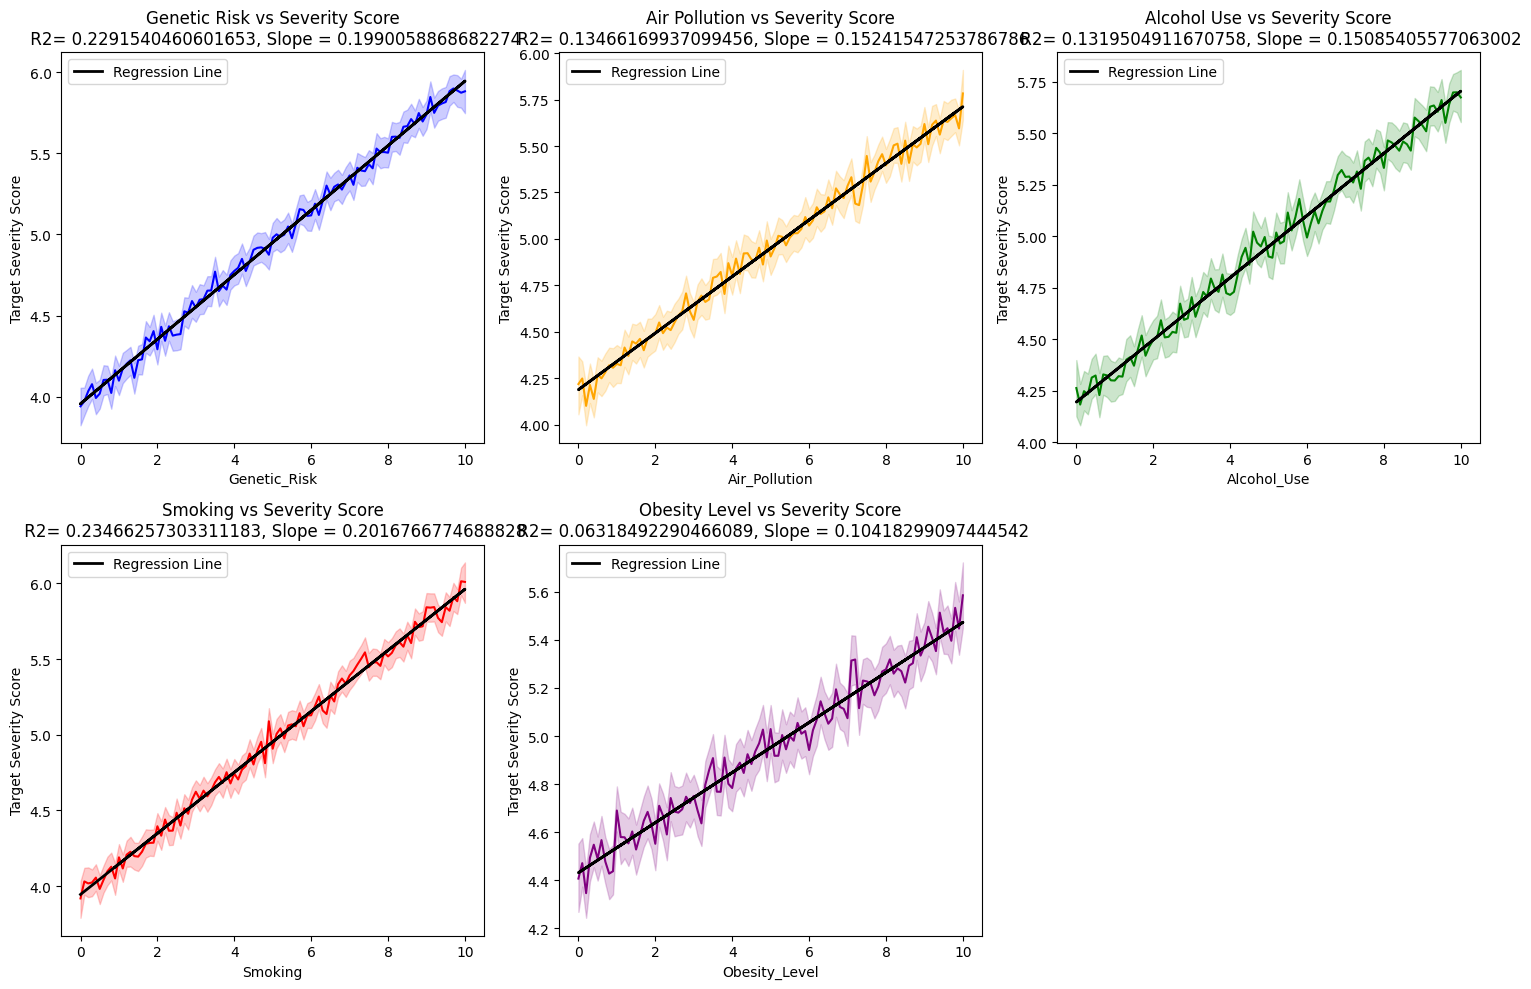

In [20]:
from scipy.stats import linregress

risk_factors = ["Genetic_Risk", "Air_Pollution", "Alcohol_Use", "Smoking", "Obesity_Level"]
titles =  ["Genetic Risk", "Air Pollution", "Alcohol Use", "Smoking", "Obesity Level"]
colors = ["blue", "orange", "green", "red", "purple"]

plt.figure(figsize=(15,10))
for i, (factor, title, color) in enumerate(zip(risk_factors, titles, colors),1):
    plt.subplot(2,3,i)

    x= data[factor]
    y = data["Target_Severity_Score"]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2


    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x, x*slope + intercept, color="black", linewidth=2, label= "Regression Line")
    plt.title(f"{title} vs Severity Score\n R2= {r_squared}, Slope = {slope}")

    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    plt.legend()

plt.tight_layout()
plt.show()

To understand the contribution of various risk factors to cancer severity, line plots were generated for five primary variables: Genetic Risk, Air Pollution, Alcohol Use, Smoking, and Obesity Level, plotted against the Target Severity Score.
All graphs reveal a positive relationship, indicating that as the level of a particular risk factor increases, the corresponding severity of the condition also tends to rise. However, the degree of association—measured by the slope and tightness of the confidence interval—varies across factors.

Genetic Risk vs Target Severity Score
R² = 0.23:
A weak linear relationship. Only 23% of the variability in Target_Severity_Score can be explained by Genetic_Risk. This suggests that other factors likely play a larger role in influencing the severity score.
Slope = 0.20:
A positive slope indicates that as Genetic_Risk increases, the Target_Severity_Score also tends to increase. For each unit increase in Genetic_Risk, the target severity score increases by 0.20 units. However, because the R² is relatively low.

Air Pollution vs Target Severity Score
R² = 0.13:
A very weak relationship. Only 13% of the variance in Target_Severity_Score can be explained by Air_Pollution, meaning that this factor has a limited effect on the target variable.
Slope = 0.15:
A positive slope means that as air pollution increases, the severity score slightly increases. But, due to the low R², this relationship is weak and unreliable as a predictor for the target severity.

Alcohol Use vs Target Severity Score
R² = 0.13:
Similarly, the relationship between Alcohol_Use and Target_Severity_Score is also weak. Only 13% of the variation in the target score is explained by alcohol use.
Slope = 0.15:
The positive slope indicates that increased alcohol use correlates with a slight increase in target severity. However, like air pollution, the weak R² suggests other factors have a much stronger influence on the target.

Smoking vs Target Severity Score
R² = 0.23:
A weak relationship, similar to Genetic_Risk. Smoking explains only 23% of the variance in the target score, leaving the majority of the variation to be explained by other factors.
Slope = 0.20:
The positive slope implies that as smoking increases, the target severity score increases as well. This relationship is similar to that of genetic risk, but with a weak linear association (low R²).

Obesity Level vs Target Severity Score
R² = 0.06:
The weakest relationship among all factors. Only 6% of the variation in the target score is explained by obesity level, suggesting that obesity has a minimal effect on the target variable.
Slope = 0.10:
A positive slope, indicating a slight increase in the severity score as obesity level increases. However, due to the very low R², this is a weak and unreliable relationship.
